In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
df = pd.read_csv("F:\\学习相关\\大四上\\毕设\\tensorflow课件\\第六讲\\data\\boston.csv", header=0)
df = df.values  #获取df的值
df = np.array(df)  #将df转换为np的数组格式
#特征数据归一化，转换为0-1之间的数
for i in range(12):
    df[:, i] = df[: , i] / (df[:, i].max() - df[:, i].min())

x_data = df[:,:12]  #二维数组操作：选择所有行，选择前12列（共13列）
y_data = df[:,12]  #二维数组操作：选择所有行，选择第13列

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
x = tf.placeholder(tf.float32, [None, 12], name="X")
y = tf.placeholder(tf.float32, [None, 1], name="Y")

In [3]:
with tf.name_scope("Model"):
    w = tf.Variable(tf.random_normal([12,1], stddev=0.01), name="W")
    b = tf.Variable(1.0, name="b")
    def model(x, w, b):
        return tf.matmul(x, w) + b
    pred = model(x, w, b)

In [4]:
#设置训练超参数
train_epochs = 300  #迭代轮次
learning_rate = 0.001  #学习率

In [5]:
#定义损失函数
with tf.name_scope("LossFunction"):
    loss_function = tf.reduce_mean(tf.pow(y-pred, 2))  #求均方误差

In [6]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)  #选择优化器

In [7]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [8]:
#模型训练
loss_list = []
for epoch in range(train_epochs):
    loss_sum = 0.0
    for xs, ys in zip(x_data, y_data):
        xs = xs.reshape(1, 12)
        ys = ys.reshape(1, 1)
        _, loss = sess.run([optimizer, loss_function], feed_dict={x: xs, y: ys})
        loss_sum = loss_sum + loss
    x_data, y_data = shuffle(x_data, y_data)
    b0temp = b.eval(session = sess)
    w0temp = w.eval(session = sess)
    loss_average = loss_sum / len(y_data)
    loss_list.append(loss_average)
    print("epoch=", epoch+1, "loss=", loss_average, "b=", b0temp, "w=", w0temp)

epoch= 1 loss= 98.19559650823867 b= 3.18293 w= [[-0.23411296]
 [ 0.7226162 ]
 [-0.0208406 ]
 [ 0.18479176]
 [ 1.6991756 ]
 [ 3.3135371 ]
 [ 0.7904103 ]
 [ 1.1389989 ]
 [-0.36326176]
 [ 0.48158127]
 [ 3.469916  ]
 [-0.3194251 ]]
epoch= 2 loss= 88.11446854022236 b= 4.3052278 w= [[-0.5372623 ]
 [ 1.6016644 ]
 [-0.70495266]
 [ 0.66042733]
 [ 2.0310802 ]
 [ 5.487857  ]
 [ 0.55612785]
 [ 1.9544486 ]
 [-1.3144764 ]
 [-0.10705823]
 [ 4.4684796 ]
 [-1.2437458 ]]
epoch= 3 loss= 72.38329664422135 b= 4.832226 w= [[-0.792214  ]
 [ 2.245702  ]
 [-1.3625848 ]
 [ 1.0747699 ]
 [ 1.918029  ]
 [ 6.8473234 ]
 [ 0.14219989]
 [ 2.3891923 ]
 [-2.1075325 ]
 [-0.7957763 ]
 [ 4.4382653 ]
 [-2.1891644 ]]
epoch= 4 loss= 63.67540812254145 b= 5.1478863 w= [[-0.9992034 ]
 [ 2.7304978 ]
 [-1.899756  ]
 [ 1.4415213 ]
 [ 1.7509322 ]
 [ 7.8811307 ]
 [-0.20455354]
 [ 2.6142092 ]
 [-2.6887403 ]
 [-1.3777541 ]
 [ 4.10654   ]
 [-3.0523343 ]]
epoch= 5 loss= 57.76276039736686 b= 5.60037 w= [[-1.1574513 ]
 [ 3.1113791 ]
 [-2.2

epoch= 36 loss= 29.060795800256564 b= 8.169504 w= [[ -2.888744  ]
 [  4.053636  ]
 [ -3.3799078 ]
 [  4.579104  ]
 [  2.165197  ]
 [ 20.458506  ]
 [  0.08714556]
 [ -1.7945963 ]
 [ -0.6469551 ]
 [ -2.6421945 ]
 [ -2.625407  ]
 [-14.158494  ]]
epoch= 37 loss= 29.01872070533574 b= 8.3232565 w= [[ -2.9204812 ]
 [  4.040425  ]
 [ -3.3231673 ]
 [  4.578251  ]
 [  2.2624042 ]
 [ 20.758087  ]
 [  0.18138918]
 [ -1.8907213 ]
 [ -0.52699983]
 [ -2.5704172 ]
 [ -2.522725  ]
 [-14.283729  ]]
epoch= 38 loss= 28.373833196565762 b= 8.21945 w= [[ -2.9617167 ]
 [  3.996129  ]
 [ -3.3687272 ]
 [  4.5512094 ]
 [  2.065678  ]
 [ 20.74504   ]
 [  0.09556168]
 [ -2.074974  ]
 [ -0.52597827]
 [ -2.7021923 ]
 [ -2.9222455 ]
 [-14.497142  ]]
epoch= 39 loss= 28.21448784439391 b= 8.329501 w= [[ -2.9895437 ]
 [  3.982179  ]
 [ -3.3285232 ]
 [  4.5275626 ]
 [  2.1034954 ]
 [ 20.989788  ]
 [  0.15742409]
 [ -2.1759012 ]
 [ -0.42899033]
 [ -2.6585505 ]
 [ -2.8882113 ]
 [-14.63791   ]]
epoch= 40 loss= 28.42800523271

epoch= 70 loss= 25.970761745281248 b= 9.984873 w= [[ -3.9834304 ]
 [  3.4931307 ]
 [ -2.682345  ]
 [  3.9207323 ]
 [  1.1664615 ]
 [ 24.467037  ]
 [  0.38812527]
 [ -5.0396967 ]
 [  0.99164116]
 [ -2.9768643 ]
 [ -4.0401125 ]
 [-17.571177  ]]
epoch= 71 loss= 25.854727567790853 b= 10.0388775 w= [[ -4.0110173 ]
 [  3.4821205 ]
 [ -2.6558406 ]
 [  3.8971565 ]
 [  1.1410397 ]
 [ 24.541124  ]
 [  0.39555812]
 [ -5.1117663 ]
 [  1.0291624 ]
 [ -2.9792118 ]
 [ -4.0484757 ]
 [-17.62132   ]]
epoch= 72 loss= 25.882537132152827 b= 10.015211 w= [[ -4.0431924]
 [  3.4612176]
 [ -2.6671891]
 [  3.8790398]
 [  1.0164088]
 [ 24.517672 ]
 [  0.3453961]
 [ -5.2064986]
 [  1.0172049]
 [ -3.053119 ]
 [ -4.210056 ]
 [-17.69845  ]]
epoch= 73 loss= 25.571009116608447 b= 10.138669 w= [[ -4.0660367]
 [  3.4526725]
 [ -2.61142  ]
 [  3.8662136]
 [  1.0691354]
 [ 24.667624 ]
 [  0.4157826]
 [ -5.251318 ]
 [  1.0754793]
 [ -3.0080023]
 [ -4.072185 ]
 [-17.711432 ]]
epoch= 74 loss= 25.803603084832467 b= 10.177205 

epoch= 104 loss= 25.00648046518426 b= 11.432485 w= [[ -4.86324   ]
 [  3.3790886 ]
 [ -2.0803668 ]
 [  3.4728816 ]
 [ -0.19877754]
 [ 25.732271  ]
 [  0.30198908]
 [ -7.054504  ]
 [  1.7544615 ]
 [ -3.488344  ]
 [ -4.6487966 ]
 [-18.57007   ]]
epoch= 105 loss= 25.128018407481374 b= 11.528886 w= [[ -4.884452  ]
 [  3.3830492 ]
 [ -2.035272  ]
 [  3.4658294 ]
 [ -0.17120911]
 [ 25.81398   ]
 [  0.33948684]
 [ -7.0843325 ]
 [  1.7976711 ]
 [ -3.455439  ]
 [ -4.547346  ]
 [-18.55934   ]]
epoch= 106 loss= 25.042992971747132 b= 11.586003 w= [[ -4.907721  ]
 [  3.3871317 ]
 [ -2.0084984 ]
 [  3.4604125 ]
 [ -0.18158855]
 [ 25.849646  ]
 [  0.35587287]
 [ -7.128947  ]
 [  1.8168293 ]
 [ -3.459313  ]
 [ -4.533342  ]
 [-18.560253  ]]
epoch= 107 loss= 24.994953295542427 b= 11.548015 w= [[ -4.9367905 ]
 [  3.3884954 ]
 [ -2.035203  ]
 [  3.4513643 ]
 [ -0.31640807]
 [ 25.780449  ]
 [  0.2885509 ]
 [ -7.1951914 ]
 [  1.779284  ]
 [ -3.5564733 ]
 [ -4.713364  ]
 [-18.61098   ]]
epoch= 108 loss= 25.0

epoch= 138 loss= 24.728728111854256 b= 13.002827 w= [[ -5.598167 ]
 [  3.538141 ]
 [ -1.5133198]
 [  3.2804277]
 [ -1.1249913]
 [ 26.34206  ]
 [  0.2782524]
 [ -8.354733 ]
 [  2.2462375]
 [ -3.8425362]
 [ -4.695068 ]
 [-18.721256 ]]
epoch= 139 loss= 24.433157255670164 b= 12.942493 w= [[ -5.621072  ]
 [  3.5269947 ]
 [ -1.5353693 ]
 [  3.2738085 ]
 [ -1.2684951 ]
 [ 26.221958  ]
 [  0.20240824]
 [ -8.4242735 ]
 [  2.2145543 ]
 [ -3.9292438 ]
 [ -4.8968554 ]
 [-18.757269  ]]
epoch= 140 loss= 24.610516620748708 b= 13.125789 w= [[ -5.633129 ]
 [  3.5418372]
 [ -1.4588515]
 [  3.2793622]
 [ -1.1253062]
 [ 26.399565 ]
 [  0.3071284]
 [ -8.412855 ]
 [  2.3033407]
 [ -3.8140574]
 [ -4.6207533]
 [-18.700352 ]]
epoch= 141 loss= 24.780529915292647 b= 13.10512 w= [[ -5.6568522 ]
 [  3.5388312 ]
 [ -1.4702632 ]
 [  3.2728727 ]
 [ -1.2252463 ]
 [ 26.329462  ]
 [  0.26032114]
 [ -8.467242  ]
 [  2.2852235 ]
 [ -3.8755703 ]
 [ -4.7488203 ]
 [-18.72271   ]]
epoch= 142 loss= 24.585014516486048 b= 13.136

epoch= 172 loss= 24.355713423234587 b= 14.294501 w= [[ -6.2382464 ]
 [  3.716055  ]
 [ -1.1498944 ]
 [  3.1848752 ]
 [ -2.0685833 ]
 [ 26.316437  ]
 [  0.12139022]
 [ -9.382341  ]
 [  2.584747  ]
 [ -4.252405  ]
 [ -5.079859  ]
 [-18.692444  ]]
epoch= 173 loss= 24.37828234985356 b= 14.491771 w= [[ -6.251434  ]
 [  3.735893  ]
 [ -1.0696044 ]
 [  3.1972802 ]
 [ -1.9066688 ]
 [ 26.506245  ]
 [  0.23588611]
 [ -9.356315  ]
 [  2.6633334 ]
 [ -4.135256  ]
 [ -4.779647  ]
 [-18.630278  ]]
epoch= 174 loss= 24.447417477146253 b= 14.414588 w= [[ -6.275592  ]
 [  3.7307882 ]
 [ -1.1197919 ]
 [  3.197843  ]
 [ -2.0737197 ]
 [ 26.368422  ]
 [  0.13657248]
 [ -9.416777  ]
 [  2.6097853 ]
 [ -4.2539334 ]
 [ -5.0219054 ]
 [-18.676903  ]]
epoch= 175 loss= 24.46509114969129 b= 14.479824 w= [[ -6.290247  ]
 [  3.7343366 ]
 [ -1.0930506 ]
 [  3.2014043 ]
 [ -2.0591176 ]
 [ 26.3978    ]
 [  0.15452814]
 [ -9.440354  ]
 [  2.6418867 ]
 [ -4.2345643 ]
 [ -4.9786067 ]
 [-18.667606  ]]
epoch= 176 loss= 24.30

epoch= 206 loss= 24.194464847899827 b= 15.757305 w= [[ -6.77285   ]
 [  3.9168606 ]
 [ -0.86734945]
 [  3.1453023 ]
 [ -2.6143324 ]
 [ 26.413597  ]
 [  0.13620184]
 [-10.103917  ]
 [  2.9760444 ]
 [ -4.4851522 ]
 [ -5.0363874 ]
 [-18.510656  ]]
epoch= 207 loss= 23.986378746897433 b= 15.874775 w= [[ -6.7800703 ]
 [  3.926987  ]
 [ -0.82267374]
 [  3.153451  ]
 [ -2.535927  ]
 [ 26.508308  ]
 [  0.20177929]
 [-10.101302  ]
 [  3.025872  ]
 [ -4.419597  ]
 [ -4.882378  ]
 [-18.478743  ]]
epoch= 208 loss= 24.274532497070375 b= 15.876423 w= [[ -6.798466  ]
 [  3.9219978 ]
 [ -0.8289329 ]
 [  3.149601  ]
 [ -2.5971298 ]
 [ 26.45825   ]
 [  0.17392026]
 [-10.136909  ]
 [  3.0232925 ]
 [ -4.452909  ]
 [ -4.95837   ]
 [-18.488127  ]]
epoch= 209 loss= 24.138216889824804 b= 15.879123 w= [[ -6.812142  ]
 [  3.9173665 ]
 [ -0.82466024]
 [  3.1468651 ]
 [ -2.6450858 ]
 [ 26.414095  ]
 [  0.15995719]
 [-10.180938  ]
 [  3.0278587 ]
 [ -4.4762597 ]
 [ -5.027791  ]
 [-18.494417  ]]
epoch= 210 loss= 24.

epoch= 240 loss= 24.047622183824355 b= 16.973953 w= [[-7.2628250e+00]
 [ 4.0517054e+00]
 [-6.8821651e-01]
 [ 3.1285770e+00]
 [-3.2466333e+00]
 [ 2.6169304e+01]
 [ 2.1519180e-02]
 [-1.0752389e+01]
 [ 3.2244015e+00]
 [-4.7700472e+00]
 [-5.3435831e+00]
 [-1.8431623e+01]]
epoch= 241 loss= 23.992193048661164 b= 17.166227 w= [[ -7.2680335 ]
 [  4.070296  ]
 [ -0.6158413 ]
 [  3.1418712 ]
 [ -3.0778623 ]
 [ 26.349377  ]
 [  0.13504915]
 [-10.717061  ]
 [  3.3052835 ]
 [ -4.647866  ]
 [ -5.0449157 ]
 [-18.371191  ]]
epoch= 242 loss= 24.06731303947894 b= 17.152645 w= [[ -7.283187  ]
 [  4.0694566 ]
 [ -0.63127875]
 [  3.1384943 ]
 [ -3.1476877 ]
 [ 26.282665  ]
 [  0.09224951]
 [-10.74818   ]
 [  3.298847  ]
 [ -4.6894464 ]
 [ -5.145991  ]
 [-18.387993  ]]
epoch= 243 loss= 24.025761252696505 b= 17.229937 w= [[ -7.2936854 ]
 [  4.080468  ]
 [ -0.6124101 ]
 [  3.142062  ]
 [ -3.1165726 ]
 [ 26.326714  ]
 [  0.11854737]
 [-10.751448  ]
 [  3.318208  ]
 [ -4.6675935 ]
 [ -5.0730605 ]
 [-18.375065  

epoch= 273 loss= 23.876907099430717 b= 18.203772 w= [[-7.6927509e+00]
 [ 4.1621604e+00]
 [-5.4458916e-01]
 [ 3.1133902e+00]
 [-3.6466649e+00]
 [ 2.6011900e+01]
 [ 9.2458744e-03]
 [-1.1245324e+01]
 [ 3.5083592e+00]
 [-4.9430523e+00]
 [-5.4673891e+00]
 [-1.8338280e+01]]
epoch= 274 loss= 23.94340964961352 b= 18.306961 w= [[ -7.7013593]
 [  4.1713448]
 [ -0.5139424]
 [  3.117454 ]
 [ -3.5829241]
 [ 26.084452 ]
 [  0.059622 ]
 [-11.237184 ]
 [  3.537603 ]
 [ -4.9032006]
 [ -5.3404737]
 [-18.312635 ]]
epoch= 275 loss= 23.95253639584481 b= 18.354542 w= [[ -7.7096186 ]
 [  4.171034  ]
 [ -0.5010223 ]
 [  3.1217835 ]
 [ -3.5737064 ]
 [ 26.090714  ]
 [  0.08039542]
 [-11.256875  ]
 [  3.5649676 ]
 [ -4.8873982 ]
 [ -5.317346  ]
 [-18.301317  ]]
epoch= 276 loss= 23.929277610935998 b= 18.34099 w= [[ -7.7244973 ]
 [  4.1741157 ]
 [ -0.5225557 ]
 [  3.1122742 ]
 [ -3.6447365 ]
 [ 26.022629  ]
 [  0.04072913]
 [-11.28342   ]
 [  3.5441139 ]
 [ -4.9343696 ]
 [ -5.424017  ]
 [-18.316715  ]]
epoch= 277 

<IPython.core.display.Javascript object>


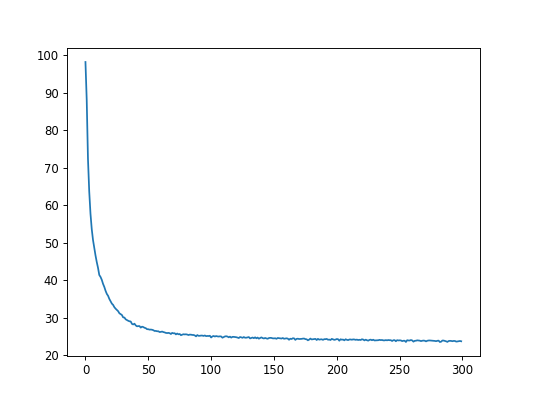

In [9]:
plt.plot(loss_list)

In [10]:
n = 384
x_test = x_data[n]
x_test = x_test.reshape(1, 12)
predict = sess.run(pred, feed_dict={x: x_test})
print("预测值：", predict)
target = y_data[n]
print("标签值：", target)

预测值： [[22.071247]]
标签值： 22.4


In [11]:
n = np.random.randint(506)
print(n)
x_test = x_data[n]
x_test = x_test.reshape(1, 12)
predict = sess.run(pred, feed_dict={x: x_test})
print("预测值：", predict)
target = y_data[n]
print("标签值：", target)

71
预测值： [[21.513958]]
标签值： 21.4
